**1.** (10 points)

Use loop to generate the 12 by 12 times table. Compile and run. You don't have to worry much about formatting, but the output should have 12 rows with numbers separated by spaces.

In [1]:
%%file q1.cpp

#include <iostream>
#include <Eigen/Dense>

using std::cout;
using std::endl;
        
int main(){
    using namespace Eigen;
    VectorXd x = VectorXd::LinSpaced(12,1,12);
    MatrixXd M = x * x.transpose();
    cout << M << endl;
}

Overwriting q1.cpp


In [2]:
%%bash

g++-7 -o q1.exe q1.cpp -std=c++14 -I ../notebooks/eigen3

In [3]:
%%bash
./q1.exe

  1   2   3   4   5   6   7   8   9  10  11  12
  2   4   6   8  10  12  14  16  18  20  22  24
  3   6   9  12  15  18  21  24  27  30  33  36
  4   8  12  16  20  24  28  32  36  40  44  48
  5  10  15  20  25  30  35  40  45  50  55  60
  6  12  18  24  30  36  42  48  54  60  66  72
  7  14  21  28  35  42  49  56  63  70  77  84
  8  16  24  32  40  48  56  64  72  80  88  96
  9  18  27  36  45  54  63  72  81  90  99 108
 10  20  30  40  50  60  70  80  90 100 110 120
 11  22  33  44  55  66  77  88  99 110 121 132
 12  24  36  48  60  72  84  96 108 120 132 144


**2.** (10 points)
 
Write a function that takes a vector of doubles  returns the squared vector. Compile and run the function with the initial vector containing 1.0, 2.0, 3.0, 4.0, 5.0.

In [4]:
%%file q2.cpp

#include <iostream>
#include <vector>

using std::cout;
using std::endl;
using std::vector;

vector<double> squared(vector<double> vec){
    vector<double> squared_vec;
    for (auto val: vec){
        squared_vec.push_back(val*val);
    }
    return squared_vec;
}

int main(){
    vector<double> v1={1.0,2.0,3.0,4.0,5.0};
    vector<double> squared_v1=squared(v1);
    for (auto val:squared_v1){
        cout << val << endl;
    }
}

Overwriting q2.cpp


In [5]:
%%bash
g++-7 -o q2.exe q2.cpp -std=c++14

In [6]:
%%bash
./q2.exe

1
4
9
16
25


**3**. (10 points)

Convert the function from Exercise 2 so that it works for lists or vectors of ints, floats and doubles.

In [7]:
%%file q3.cpp

#include <iostream>
#include <vector>

using std::cout;
using std::endl;
using std::vector;

template<typename T>
vector<T> squared(vector<T> vec){
    vector<T> squared_vec;
    for (auto val: vec){
        squared_vec.push_back(val*val);
    }
    return squared_vec;
}

int main(){
    vector<int> v1={1,2,3,4,5};
    vector<float> v2={1.0,2.0,3.0,4.0,5.0};
    vector<double> v3={1.0,2.0,3.0,4.0,5.0};
    
    vector<int> squared_v1=squared(v1);
    vector<float> squared_v2=squared(v2);
    vector<double> squared_v3=squared(v3);
    // test vectors have same size, different data type
    for (auto i=0; i<v1.size() ; i++){
        cout << squared_v1[i] <<' ' << squared_v2[i]<<' '<< squared_v3[i] << endl;
    }
}

Overwriting q3.cpp


In [8]:
%%bash
g++-7 -o q3.exe q3.cpp -std=c++14

In [9]:
%%bash
./q3.exe

1 1 1
4 4 4
9 9 9
16 16 16
25 25 25


**4**. (10 pionts)

Write a function to calculate the mean of a vector of numbers using `accumulate` from the `<numeric>` library. Compile and test with some vectors.

In [10]:
%%file q4.cpp

#include <iostream>
#include <numeric>
#include <vector>

using std::cout;
using std::endl;
using std::accumulate;
using std::vector;
using std::begin;
using std::end;

double mean(vector<double> vec){
    return accumulate(begin(vec), end(vec), 0.0)/vec.size();
}        
        
int main(){
    vector<double> v1={1,2,3,4,5};
    vector<double> v2={-1.2, -3.4, 5.7, 10, 4};
    cout << mean(v1) << ' ' << mean(v2) << endl;
}

Overwriting q4.cpp


In [11]:
%%bash
g++-7 -o q4.exe q4.cpp -std=c++14

In [12]:
%%bash
./q4.exe

3 3.02


**5**. (10 points)

Generate 1000 random points from the exponential distribution and save as a comma-separated values (CSV) file. Open the file in Python and plot the distribution using `plt.hist`.

In [13]:
%%file q5.cpp

#include <fstream>
#include <random>
#include <functional>

using std::ofstream;
using std::default_random_engine;
using std::exponential_distribution;
using std::bind;
        
int main(){
    ofstream fout("exp_random_data.csv");
    default_random_engine re{12345};
    exponential_distribution<double> exp_dist(5);
    auto rexp = bind(exp_dist, re);
    for (int i=0; i<1000; i++){
        fout << rexp() << "\n";
    }
}

Overwriting q5.cpp


In [14]:
%%bash
g++-7 -o q5.exe q5.cpp -std=c++14

In [15]:
%%bash
./q5.exe

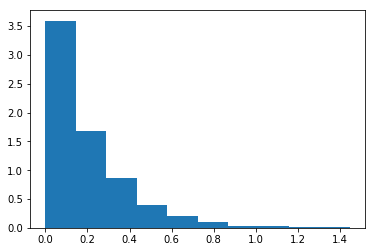

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
try:
    data = np.loadtxt("exp_random_data.csv")
    plt.hist(data, density=True)
except FileNotFoundError:
    pass

**6**. (20 points)

Implement Newton's method in 1D for root finding. Pass in the function and gradient as generalized function pointers. Use the method to find all roots of the polynomial equation $f(x) = x^3 - 7x - 6$. You may use the `std::abs` and `std::pow` from the `cmath` library.

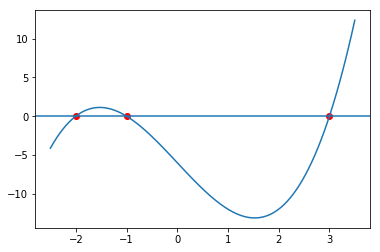

In [17]:
f = lambda x: x**3 - 7*x - 6
r = np.roots([1, 0, -7, -6])

xi = np.linspace(-2.5, 3.5, 100)
plt.plot(xi, f(xi))
plt.scatter(r, np.zeros_like(r), c='red')
plt.axhline(0)
plt.show()

In [18]:
%%file q6.cpp

#include <iostream>
#include <functional>
#include <cmath>

using std::cout;
using std::endl;
using std::function;
using std::pow;
using std::abs;
using func = function<double(double)>;


double newton(double x0, func f, func grad){
    int max_itr = 100;
    double tol = 0.00001;
    double sln = x0;
    double fval;
    for (int i=0; i<max_itr; i++){
        fval = f(sln);
        if(abs(fval) < tol){
            break;
        }
        else{
            sln = sln - fval/grad(sln);
        }
    }
    return sln;
}

int main(){
    auto f = [](double x){return pow(x,3)-7*x-6;};
    auto grad = [](double x){return 3*pow(x,2)-7;};
    double x0[3]={-3,0,4};
    for (auto val:x0){
        cout << newton(val, f, grad) << endl;
    }
}

Overwriting q6.cpp


In [19]:
%%bash
g++-7 -o q6.exe q6.cpp -std=c++14

In [20]:
%%bash
./q6.exe

-2
-1
3


**7**.  (30 points)

Use the Eigen library to

- Generate 10 x-coordinates linearly spaced between 10 and 15
- Generate 10 random y-values as $y = 3x^2 - 7x + 2 + \epsilon$ where $\epsilon \sim 10 N(0,1)$
- Find the length of $x$ and $y$ and the Euclidean distance between $x$ and $y$
- Find the correlation between $x$ and $y$ using
![img](https://wikimedia.org/api/rest_v1/media/math/render/svg/60e3f3116e2923c792aafb904dcac308624a1d77)
- Solve the linear system to find a quadratic fit for this data

If you use the seed 12345 for the random number generator, you should get the following solutions.

In [21]:
x = np.array('10 10.5556 11.1111 11.6667 12.2222 12.7778 13.3333 13.8889 14.4444 15'.split()).astype('float')
y = np.array('232.862 264.056 310.697 322.345 359.037 412.095 448.471 468.163 533.646 579.763'.split()).astype('float')

In [22]:
np.linalg.norm(x), np.linalg.norm(y)

(39.849248331681238, 1290.0872394156142)

In [23]:
np.linalg.norm(x-y)

1250.6696992541238

In [24]:
np.corrcoef(x, y)[0,1]

0.99408300523983062

In [27]:
X = np.c_[np.ones_like(x), x, x**2]
np.linalg.lstsq(X, y)[0]

array([ 100.9138974 ,  -22.66697873,    3.62437276])

**Note**: Remember to indicate the location of the eigen3 headers using the `-I` flag

In [28]:
%%file q7.cpp

#include <iostream>
#include <Eigen/Dense>
#include <random>
#include <functional>
#include <cmath>

using std::cout;
using std::endl;
using std::default_random_engine;
using std::normal_distribution;
using std::bind;
using std::sqrt;

default_random_engine re{12345};
normal_distribution<double> normal(0,1);
auto rnorm = bind(normal, re);

int main(){
    using namespace Eigen;
    VectorXd x = VectorXd::LinSpaced(10, 10, 15);
    VectorXd y = x.unaryExpr([](double x){return 3*x*x-7*x+2+10*rnorm();});
    
    double x_norm = x.norm();
    double y_norm = y.norm();
    double dist = (x-y).norm();
    
    VectorXd x_mean = VectorXd::Constant(x.size(), x.sum()/x.size());
    VectorXd y_mean = VectorXd::Constant(y.size(), y.sum()/x.size());
    VectorXd x1 = x - x_mean;
    VectorXd y1 = y - y_mean;
    double corr = x1.dot(y1)/(x1.norm()*y1.norm());
    
    MatrixXd Xmat(x.size(),3);
    Xmat << VectorXd::Constant(10, 1), x, x.unaryExpr([](double x){return x*x;});
    
    VectorXd sln = Xmat.jacobiSvd(ComputeThinU | ComputeThinV).solve(y);
    
    
    cout << "x = " << x.transpose() << endl;
    cout << "y = " << y.transpose() << endl;
    cout << "length of x = " << x_norm << endl;
    cout << "length of y = " << y_norm << endl;
    cout << "distance between x and y is " << dist << endl;
    cout << "correlation between x and y is " << corr << endl;
    cout << "quadratic fit parameters are " << sln.transpose() << endl;
}



Overwriting q7.cpp


In [29]:
%%bash
g++-7 -o q7.exe q7.cpp -std=c++14 -I ../notebooks/eigen3

In [30]:
%%bash
./q7.exe

x =      10 10.5556 11.1111 11.6667 12.2222 12.7778 13.3333 13.8889 14.4444      15
y = 233.118 256.464 288.336  334.49 359.992 406.205 435.374  476.11 528.573 577.913
length of x = 39.8493
length of y = 1280.37
distance between x and y is 1240.97
correlation between x and y is 0.99626
quadratic fit parameters are   92.219 -22.5769  3.65027
